<ipython-input-1-ec6d4ea4c23d>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


k-NN Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       117
           1       0.60      0.54      0.57        52

    accuracy                           0.75       169
   macro avg       0.70      0.69      0.69       169
weighted avg       0.74      0.75      0.74       169

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.84       117
           1       0.64      0.52      0.57        52

    accuracy                           0.76       169
   macro avg       0.72      0.70      0.71       169
weighted avg       0.75      0.76      0.76       169



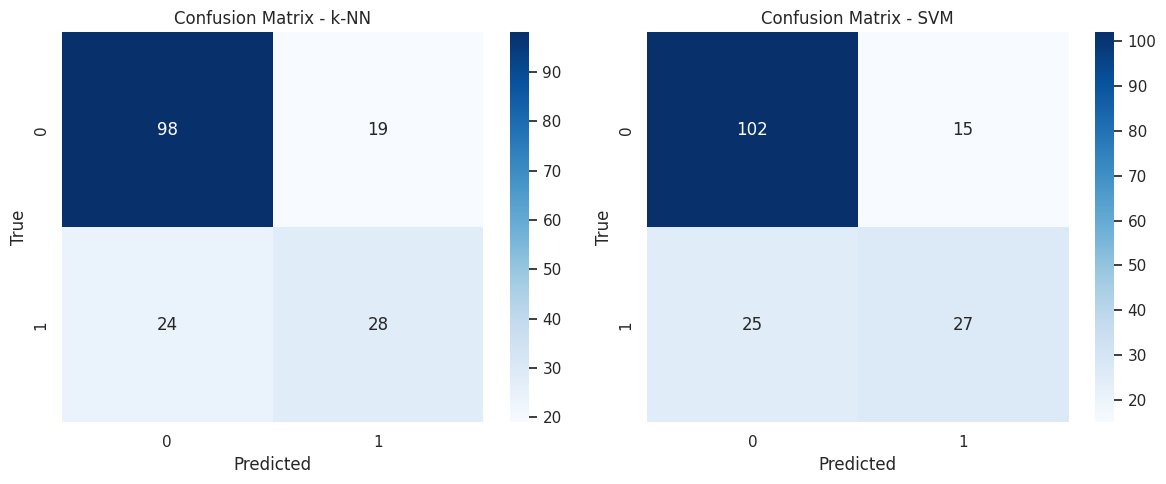

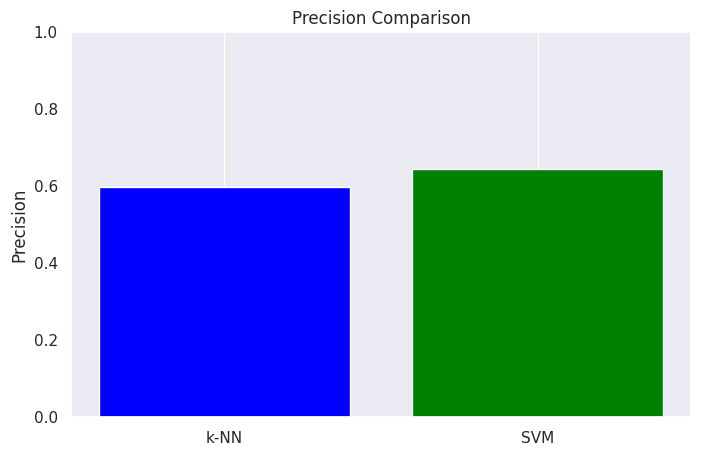

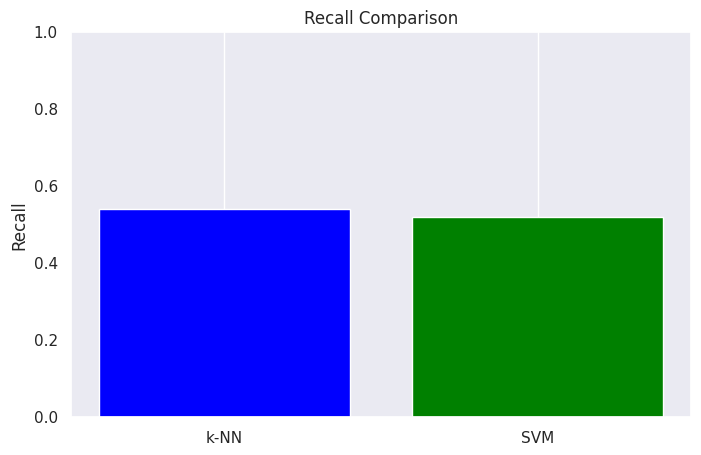

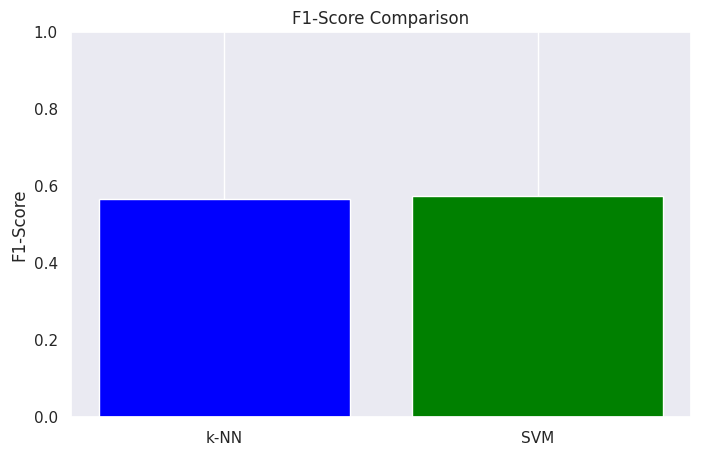

✅ Models saved as knn_model.pkl and svm_model.pkl


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import joblib

# Set style for plots
sns.set()

# Load the dataset
data = pd.read_csv('/content/diabetes prediction dataset.csv')

# Handle zero values (treat them as missing)
cols_with_zero = ['BMI', 'BloodPressure', 'Glucose', 'Insulin', 'SkinThickness']
for col in cols_with_zero:
    data[col] = data[col].replace(0, np.nan)
    data[col].fillna(data[col].mean(), inplace=True)

# Outlier removal
def remove_outliers(df, column, quantile):
    upper_limit = df[column].quantile(quantile)
    return df[df[column] < upper_limit]

data = remove_outliers(data, 'Pregnancies', 0.98)
data = remove_outliers(data, 'BMI', 0.99)
data = remove_outliers(data, 'SkinThickness', 0.99)
data = remove_outliers(data, 'Insulin', 0.95)
data = remove_outliers(data, 'DiabetesPedigreeFunction', 0.99)
data = remove_outliers(data, 'Age', 0.99)

# Features and labels
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
knn_model = KNeighborsClassifier()
svm_model = SVC(probability=True)

# Cross-validation
knn_cv = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')
svm_cv = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

# Fit models
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Predictions
knn_pred = knn_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# Reports
print("k-NN Classification Report:\n", classification_report(y_test, knn_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))

# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='g', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - k-NN')
axes[0].set_xlabel('Predicted'); axes[0].set_ylabel('True')

sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='g', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix - SVM')
axes[1].set_xlabel('Predicted'); axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()

# Evaluation metrics for plotting
models = {'k-NN': knn_pred, 'SVM': svm_pred}
precision_scores = {}
recall_scores = {}
f1_scores = {}

for name, pred in models.items():
    precision_scores[name] = precision_score(y_test, pred)
    recall_scores[name] = recall_score(y_test, pred)
    f1_scores[name] = f1_score(y_test, pred)

# Plotting metrics
def plot_metric(metric_dict, metric_name):
    plt.figure(figsize=(8, 5))
    plt.bar(metric_dict.keys(), metric_dict.values(), color=['blue', 'green'])
    plt.title(f'{metric_name} Comparison')
    plt.ylabel(metric_name)
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.show()

plot_metric(precision_scores, "Precision")
plot_metric(recall_scores, "Recall")
plot_metric(f1_scores, "F1-Score")

# Save models as .pkl
joblib.dump(knn_model, "knn_model.pkl")
joblib.dump(svm_model, "svm_model.pkl")
print("✅ Models saved as knn_model.pkl and svm_model.pkl")


In [2]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 117.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.0 MB/s eta 0:00:00


In [3]:
%%writefile app.py

import gradio as gr
import numpy as np
import joblib

# Load models
knn_model = joblib.load("knn_model.pkl")
svm_model = joblib.load("svm_model.pkl")

def predict(pregnancies, glucose, bp, skin, insulin, bmi, dpf, age, model_choice):
    user_input = np.array([[pregnancies, glucose, bp, skin, insulin, bmi, dpf, age]])
    model = knn_model if model_choice == "k-NN" else svm_model
    pred = model.predict(user_input)[0]
    return "Diabetic" if pred == 1 else "Non-Diabetic"

inputs = [
    gr.Number(label="Pregnancies", value=0),
    gr.Number(label="Glucose Level", value=0),
    gr.Number(label="Blood Pressure", value=0),
    gr.Number(label="Skin Thickness", value=0),
    gr.Number(label="Insulin", value=0),
    gr.Number(label="BMI", value=0.0),
    gr.Number(label="Diabetes Pedigree Function", value=0.0),
    gr.Number(label="Age", value=10),
    gr.Radio(["k-NN", "SVM"], label="Choose Model")
]

output = gr.Textbox(label="Prediction")

demo = gr.Interface(fn=predict, inputs=inputs, outputs=output, title="Diabetes Prediction App")
demo.launch(share=True)  # share=True creates a public URL automatically


Writing app.py


In [4]:
%%writefile requirements.txt
gradio
numpy
scikit-learn
joblib


Writing requirements.txt


In [5]:
!pip install huggingface_hub
from huggingface_hub import login
login()

In [6]:
!apt-get install git -y
!git config --global user.email "aalokhya@gmail.com"
!git config --global user.name "aalokhya"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [7]:
!git clone https://huggingface.co/spaces/Aalokhya/Diabetes-Prediction

Cloning into 'Diabetes-Prediction'...
remote: Enumerating objects: 4, done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 4 (from 1)
Unpacking objects: 100% (4/4), 1.28 KiB | 1.28 MiB/s, done.


In [11]:
%cd Diabetes-Prediction


/content/Diabetes-Prediction


In [12]:
!mv /content/app.py .
!mv /content/requirements.txt .
!mv /content/knn_model.pkl .
!mv /content/svm_model.pkl .


In [13]:
!git add app.py requirements.txt knn_model.pkl svm_model.pkl
!git commit -m "Add diabetes prediction app and model files"
!git push

[main 9bb78b0] Add diabetes prediction app and model files
 4 files changed, 41 insertions(+)
 create mode 100644 app.py
 create mode 100644 knn_model.pkl
 create mode 100644 requirements.txt
 create mode 100644 svm_model.pkl
Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 2 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (6/6), 1.18 KiB | 1.18 MiB/s, done.
Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
To https://huggingface.co/spaces/Aalokhya/Diabetes-Prediction
   3bfdc15..9bb78b0  main -> main
